# Superdense Coding Algorithm

Superdense  coding is a technique  of sending or transfering two bit classical information by sending a single qubit. It is considered a opposite process of Quantum teleporation algorithm. Quantum teleportation trasnfers one qubit by sending two classical bits while superdense coding does the reverse. 

Clasically if one wish to  send two bits of information, two bits of infromation needs to be sent from sender to reciever. This quantum algorithm used only single qubit or single channel. This techinque is called superdense coding because of it unique feature of encoding two bit in a single qubit. This protocol was initially developed by Bennett and Wiesner and
then further specified as a secure communications protocol . Anton Zeilinger experimentally demonstrated superdense coding transmission in 1995.[1]

The steps for sending two bit data from alice to bob using superdense coding involve following steps:
1. An EPR pair(entangled pair) is created, one is sent to alice and another to bob
2. Alice encodes two bit data to be trasfered to bob into her qubit by performing a set of operation shown in the figure below.
3. Alice send her qubit to bob through a quantum channel.
4. Bob applies hadamard gate followed by a C-NOT gate on his qubit.
5. Bob measures the two qubits and gets the exact same two bit encoded by alice

![superdense_coding_alice_operation.PNG](figures/superdense_coding_alice_operation.PNG)

Figure showing the workings of superdense coding.

![superdense_coding_circuit_diagram.PNG](figures/superdense_coding_circuit_diagram.PNG)

In [1]:
%matplotlib inline
from math import pi
import numpy as np
from qiskit import *
from qiskit.visualization import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import Aer
from qiskit.providers.aer import unitary_simulator
backend = Aer.get_backend('unitary_simulator')
simulator = Aer.get_backend('qasm_simulator')
statevector= Aer.get_backend('statevector_simulator')
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [2]:
 # Create a EPR pair, entangled state
def bell_state(qc,a,b):     
    qc.h(a)
    qc.cx(a,b)
# Encode message msg by alice on her qubit
def alice_encode(qc,qubit,msg):   
    if msg=='00':
        pass
    elif msg=='01':
        qc.z(qubit)
    elif msg=='10':
        qc.x(qubit)
    elif msg=='11':
        qc.z(qubit)
        qc.x(qubit)
# Decode message by bob after sending the qubit to bob
def decode_message(qc,a,b):
    qc.cx(a,b)
    qc.h(a)

## Superdense Coding 

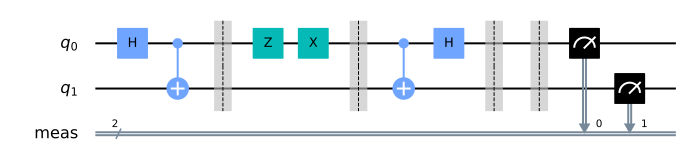

In [3]:
qc= QuantumCircuit(2)
# Step 1
bell_state(qc,0,1)
qc.barrier()
# Step 2
msg='11'  # two bit data to be sent to bob
alice_encode(qc,0,msg)
qc.barrier()
# Step 4
decode_message(qc,0,1)
qc.barrier()
# Step 5
qc.measure_all()
qc.draw(output='mpl')

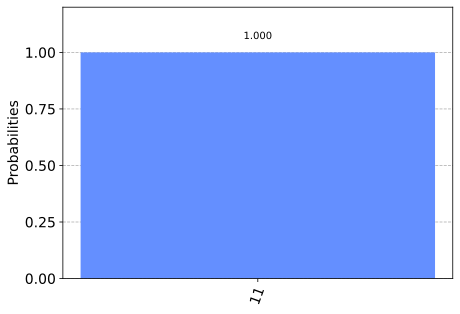

In [4]:
counts=execute(qc,simulator,shots=1000).result().get_counts(qc)    # simulator = Aer.get_backend('qasm_simulator')
plot_histogram(counts)

In [ ]:
#on quantum computer(Copied qiskit textbook)
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 512

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)


ibmqfactory.load_account:WARNING:2020-05-11 10:53:44,917: Credentials are already in use. The existing account in the session will be replaced.


In [23]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


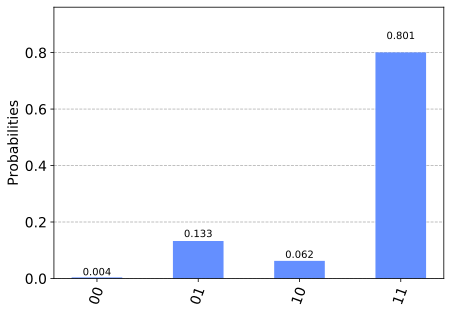

In [22]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))

In [28]:
correct_results = result.get_counts(qc)[msg]
accuracy = (correct_results/shots)*100
print("Accuracy = %.2f%%" % accuracy)

Accuracy = 80.08%


In [5]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.20.0'}

## Bibliography

- https://qiskit.org/textbook/ch-algorithms/superdense-coding.html
- Hidary, Jack. (2019). Quantum Computing: An Applied Approach. 10.1007/978-3-030-23922-0.